#CIS 412 - Team Project - Airline Passenger Satisfaction

Link to the chosen dataset: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

## Team Member
Ngoc Tran (Tisa) - ntran30@asu.edu

Thuy Linh Luong - tluong8@asu.edu

Long Cap - tcap1@asu.edu

Yen Ping Choo - ychoo2@asu.edu

Luke - xinleluk@asu.edu



## Business Understanding

The goal of this analysis is to identify the key factors that influence passenger satisfaction and predict whether passengers will be **satisfied** or **neutral/dissatisfied** with their flight experience. Understanding these factors is essential for airlines, as customer satisfaction plays a significant role in both short-term and long-term business outcomes.


Customer satisfaction directly affects several key areas of an airline’s business, including revenue, operational efficiency, and competitive advantage. Satisfied passengers are more likely to return for future flights and recommend the airline to others, leading to higher sales and a stronger market position. On the other hand, dissatisfied passengers may choose competitors, resulting in lost revenue and negative publicity. By improving satisfaction, airlines can strengthen customer loyalty and boost profitability.

This analysis will use the Airline Passenger Satisfaction dataset from Kaggle, which contains detailed information on various aspects of passengers’ experiences, such as service ratings, flight delays, and customer demographics. The insights from this dataset will help airlines identify areas for operational improvement, including inflight services, seat comfort, and check-in processes, which are key factors that influence passenger satisfaction. With these insights, airlines will be able to make informed, data-driven decisions to enhance their services, improve passenger retention, and drive greater profitability.

## Data Preparation

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/My Drive/CIS 412 Team Project/train.csv')
test = pd.read_csv('/content/drive/My Drive/CIS 412 Team Project/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(train.columns)
print(test.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'D

In [ ]:
df = pd.concat([train, test], ignore_index=True)

In [ ]:
df.shape

(129880, 25)

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)

In [ ]:
df.dtypes

,0
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64
Ease of Online booking,int64
Gate location,int64


In [ ]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
df['satisfaction'].value_counts()

,count
satisfaction,
neutral or dissatisfied,73452
satisfied,56428


Regarding **data quality:**
* **Missing Values:** The "Arrival Delay in Minutes" column had missing values, which have been imputed with the mean of the column. Other features may have missing data that will need to be addressed as the analysis progresses.
* **No significant outliers or noise** were identified in the dataset, but potential issues could arise if they were present, affecting the accuracy of the model if not handled.

By addressing these missing values and any further data quality issues, airlines can ensure that the analysis is based on the most accurate data possible, ultimately enhancing the reliability of the model’s predictions.

## Data Understanding

The dataset we are working with contains multiple variables that capture various aspects of passenger experiences. These include customer demographics (e.g., gender, age), operational details (e.g., flight distance, delays), and service-related feedback (e.g., satisfaction with in-flight services, seat comfort, food and drink, baggage handling, etc.). The target variable, "**Satisfaction**," is binary, with two possible outcomes: **satisfied** and **neutral/dissatisfied**.

Key features in the dataset include:
*   **Service-related features:** Inflight wifi, seat comfort, food and drink, cleanliness, etc.
*   **Operational factors:** Departure and arrival delays, flight distance.
*   **Customer-related features:** Age, gender, customer type, type of travel, class.
*   **Booking-related features:** Ease of online booking, check-in service, online boarding.

These features are expected to influence passengers' satisfaction levels, and understanding their relationships is crucial for building an effective predictive model. For example, we expect in-flight service quality (e.g., seat comfort, food and drink) to have a direct impact on overall satisfaction, while operational factors like flight delays may cause dissatisfaction, especially when combined with poor service.














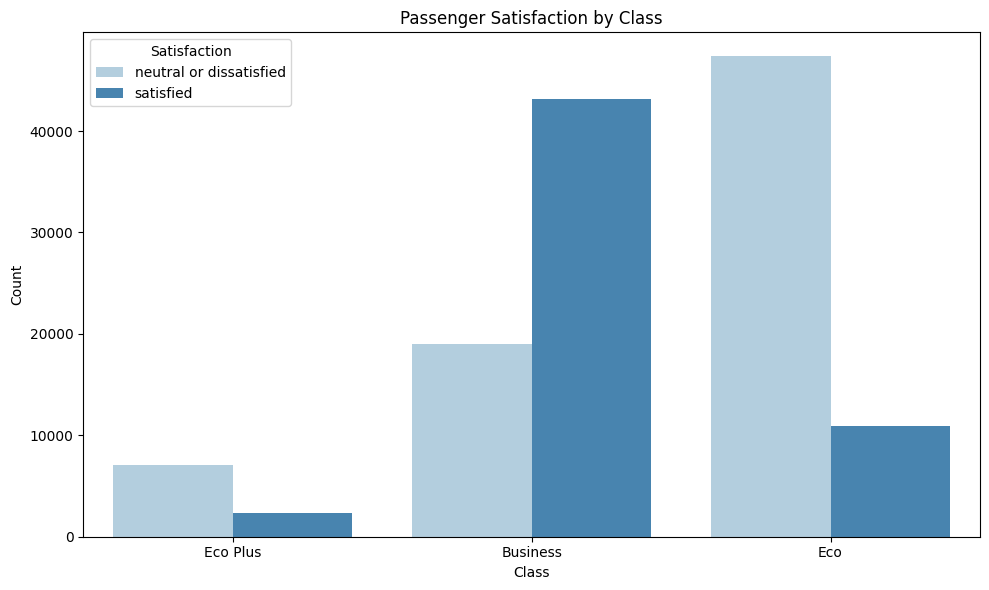

In [ ]:
# Passenger Satisfaction by Class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class', hue='satisfaction', palette='Blues')
plt.title('Passenger Satisfaction by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

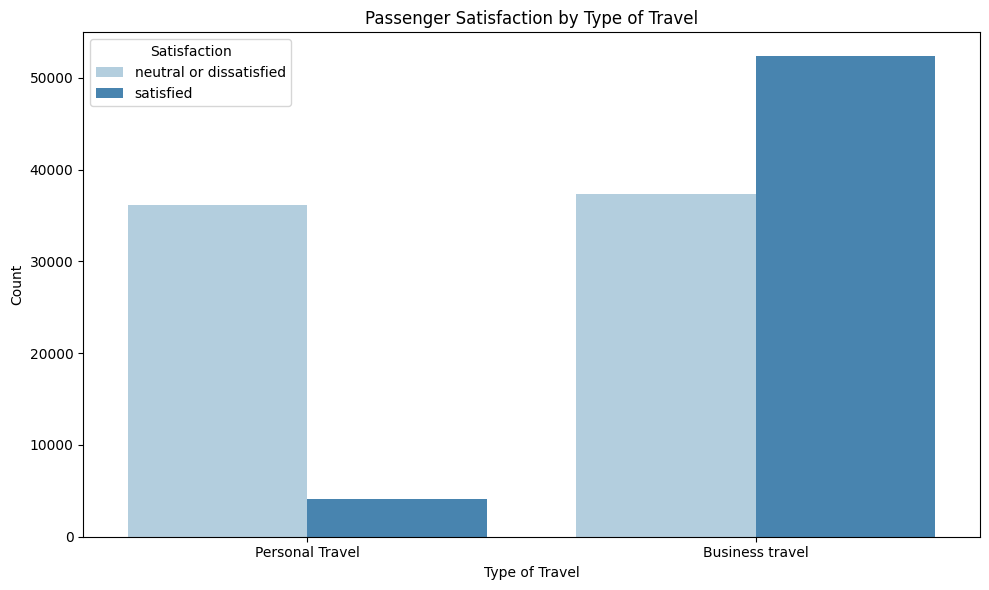

In [ ]:
# Passenger Satisfaction by Travel Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', palette='Blues')
plt.title('Passenger Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

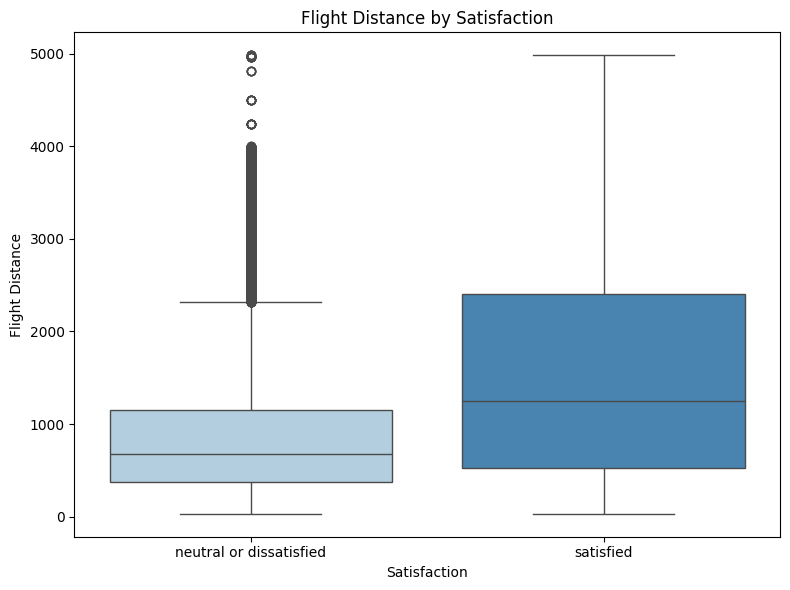

In [ ]:
# Boxplot of Flight Distance by Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='satisfaction', y='Flight Distance', palette='Blues')
plt.title('Flight Distance by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance')
plt.tight_layout()
plt.show()

## Modeling and Evaluation


In [ ]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [ ]:
#Encoding predictors
X = pd.get_dummies(X,drop_first=True, dtype=int)
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,6.0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0.0,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,9.0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,0.0,1,0,0,0,0


In [ ]:
#Encoding target variable
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df['satisfaction'])
y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Interpret coefficient, which is saved in .coef attribute
coef = pd.DataFrame(logreg.coef_[0], index = X.columns,columns=['Coefficients'])
coef

,Coefficients
Age,-0.022820
Flight Distance,0.000241
Inflight wifi service,0.331816
Departure/Arrival time convenient,-0.533394
Ease of Online booking,0.012586
Gate location,-0.429998
Food and drink,-0.222923
Online boarding,0.713534
Seat comfort,0.125332
Inflight entertainment,0.322885


In [ ]:
# coefficient is intepreted as with one unit change in X, how many unit will change in log(odds). We need to take exponentiate
# of the original coeffient and interpret it in terms of odds
import numpy as np
df = pd.DataFrame(np.exp(logreg.coef_[0]), index = X.columns,columns = ['Odds'])
df
df.sort_values(by=['Odds'])

,Odds
Class_Eco,0.557631
Type of Travel_Personal Travel,0.586029
Departure/Arrival time convenient,0.586610
Gate location,0.650511
Customer Type_disloyal Customer,0.789181
Food and drink,0.800176
Inflight service,0.841249
Baggage handling,0.867010
Gender_Male,0.914038
Class_Eco Plus,0.928237


In [ ]:
#  Get the top 5 most important features
top_5_features = df.sort_values(by=['Odds'], ascending=False).head(5)
print("\nTop 5 most significant features:")
print(top_5_features)

# Get the bottom 5 features
bottom_5_features = df.sort_values(by=['Odds']).head(5)
print("\nBottom 5 most significant features:")
print(bottom_5_features)



Top 5 most significant features:
                            Odds
Online boarding         2.041192
Inflight wifi service   1.393497
Inflight entertainment  1.381107
On-board service        1.193943
Leg room service        1.163094

Bottom 5 most significant features:
                                       Odds
Class_Eco                          0.557631
Type of Travel_Personal Travel     0.586029
Departure/Arrival time convenient  0.586610
Gate location                      0.650511
Customer Type_disloyal Customer    0.789181


And now we will evaluate the Logistics Regression model

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
#accuracy as one evaluation metrics
from sklearn import metrics
print('Accuracy on the training set:', logreg.score(X_train, y_train))
print('Accuracy on the test set:', metrics.accuracy_score(y_test, y_pred))

Accuracy on the training set: 0.7851478287650139
Accuracy on the test set: 0.7847243609485679


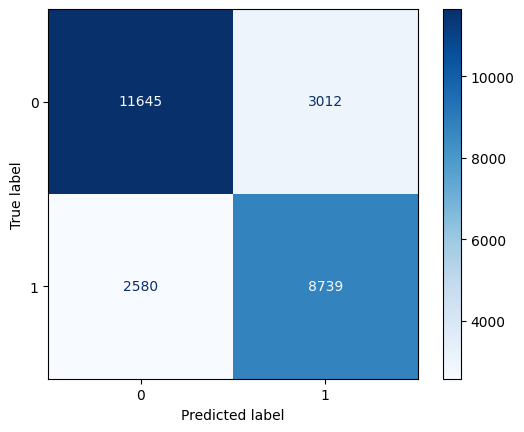

In [ ]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

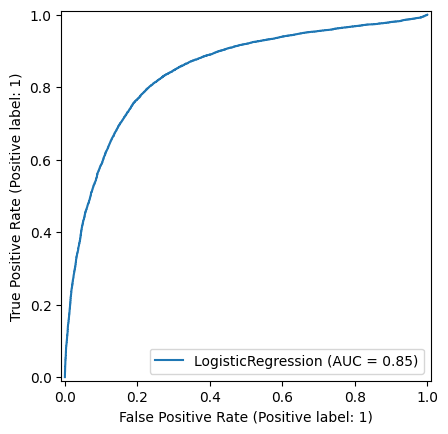

In [ ]:
# ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

### Decision Tree

We first build a fully developed decision tree model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0, criterion='entropy')

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
print('Accuracy on training set:',tree.score(X_train, y_train))

Accuracy on training set: 1.0


In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on training set:',tree.score(X_train, y_train))
print('Accuracy on test set:',accuracy_score(y_pred, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.9477594702802588


In [ ]:
# variable importance in decision tree
importance = pd.DataFrame(tree.feature_importances_, index = X.columns, columns = ['Importance'])
importance.sort_values(by = 'Importance', ascending = False)

,Importance
Online boarding,0.304045
Inflight wifi service,0.192439
Type of Travel_Personal Travel,0.134357
Inflight entertainment,0.066696
Customer Type_disloyal Customer,0.044070
Checkin service,0.032697
Flight Distance,0.029836
Age,0.025947
Baggage handling,0.025493
Inflight service,0.024967


In this step, we aim to improve the model performance by applying a hyperparameter tuning model using GridSearch algorithm. (Take about 1 hour 10 minutes to run)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_leaf_nodes': np.arange(2, 50), 'max_depth': np.arange(3, 15)}
tree_grid = GridSearchCV(tree, params, cv=10)
tree_grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
best_tree = tree_grid.best_estimator_
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(11),
                       max_leaf_nodes=np.int64(49), random_state=0)

From GridSearch algorithm, the best tree has the max_depth = 11 and max_leaf_nodes = 49

In [ ]:
y_pred_grid = best_tree.predict(X_test)
print('Grid-search Model Accuracy on training set: {:.4f}'.format(best_tree.score(X_train, y_train)))
print("Grid-search Model Accuracy on test set: {:.4f}".format(accuracy_score(y_test, y_pred_grid)))


Grid-search Model Accuracy on training set: 0.9421
Grid-search Model Accuracy on test set: 0.9408


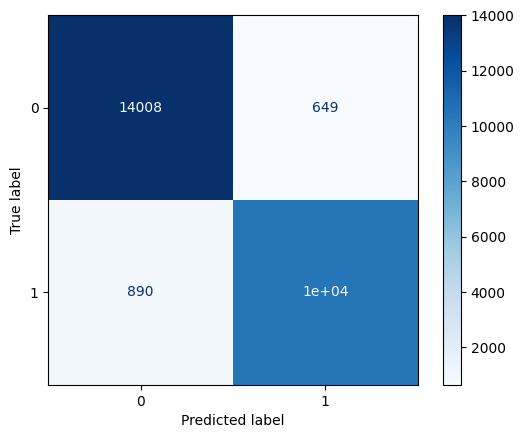

In [ ]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_grid, cmap='Blues')

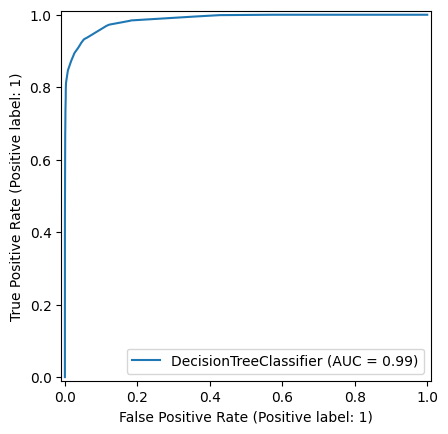

In [ ]:
# ROC Curve
RocCurveDisplay.from_estimator(best_tree, X_test, y_test)

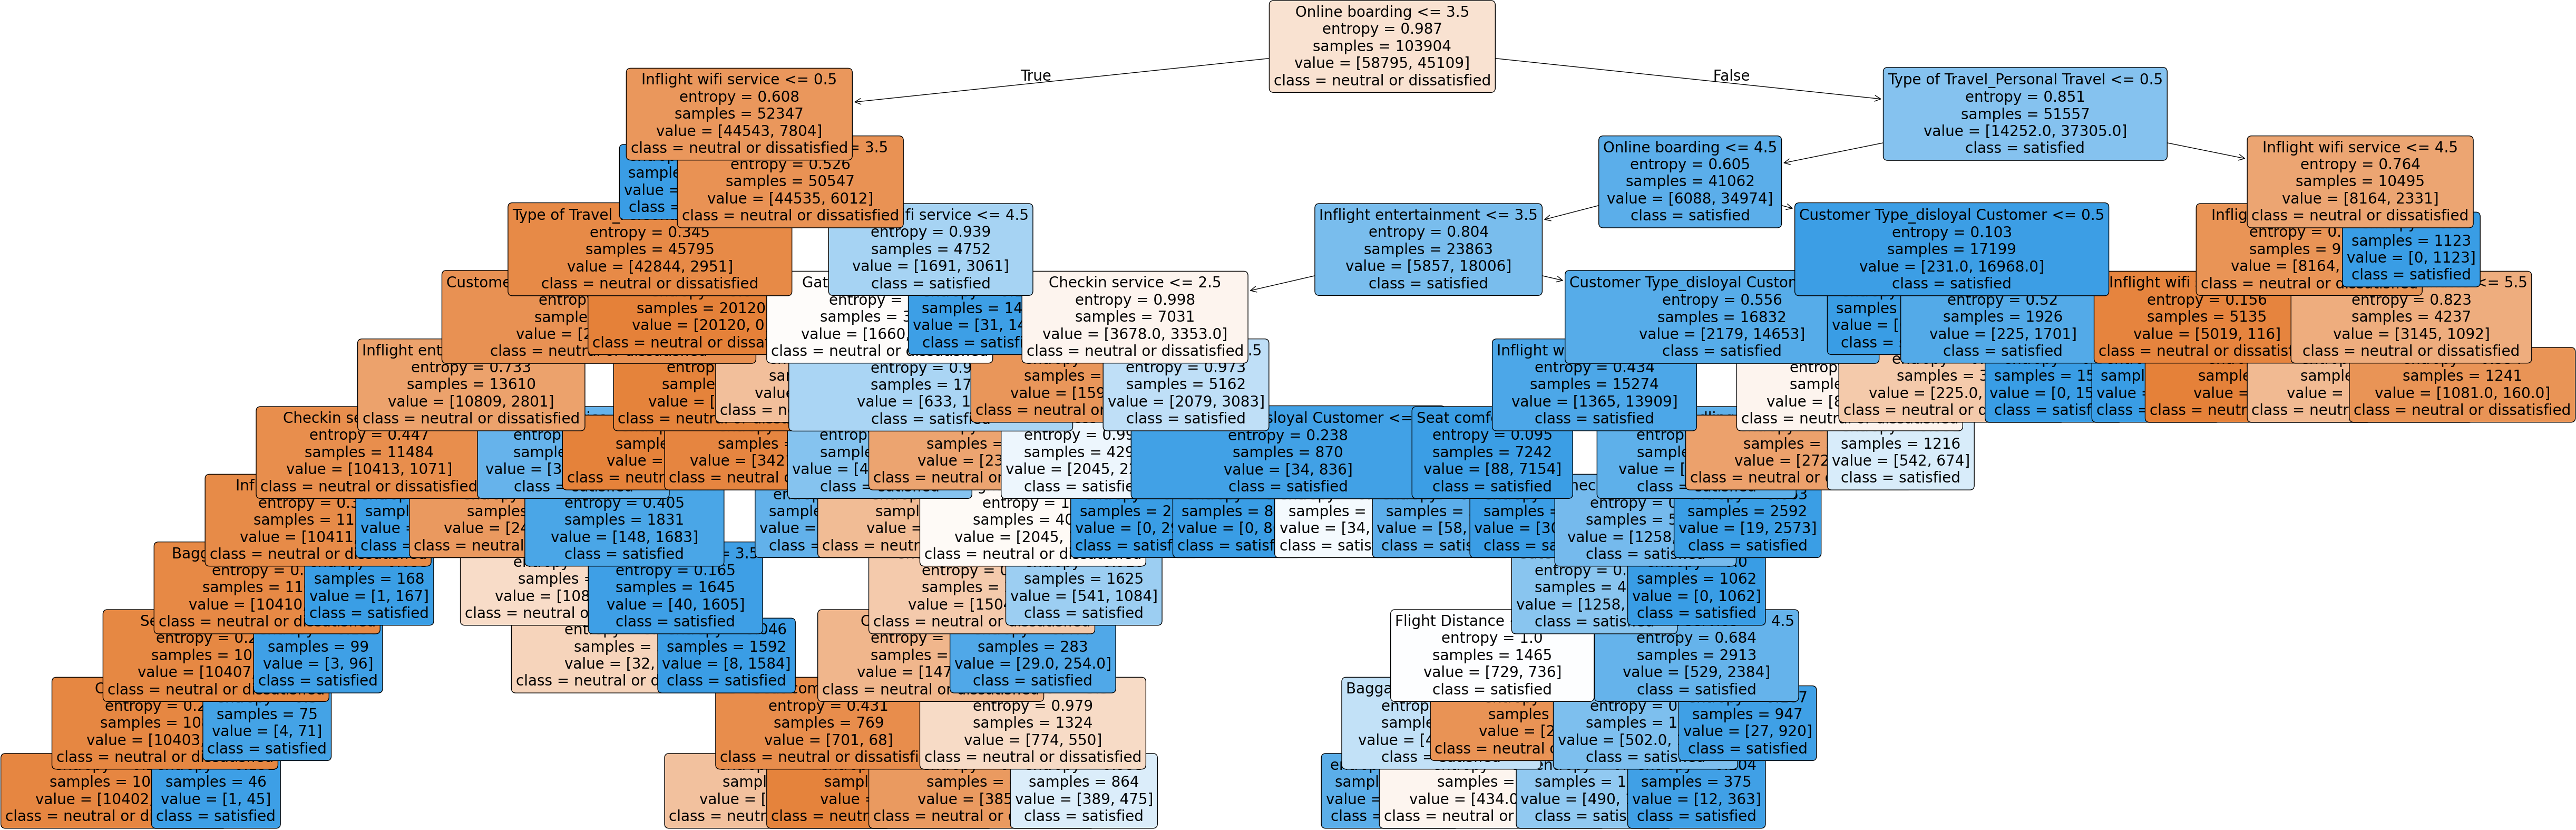

In [ ]:
# visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(60,20))
display_tree = plot_tree(best_tree,
              feature_names=X.columns,
              class_names=['neutral or dissatisfied', 'satisfied'],
              filled=True,
              rounded=True,
              fontsize=20)

### Model Improvement for Decision Tree model

Perform K-fold Cross Validation to evaluate how well a machine learning model generalizes to unseen data, ensuring its performance is not just a chanced occurance of a single training/testing split

Cross-Validation Scores: [0.94933785 0.94779797 0.947336   0.9487219  0.94764398 0.94687404
 0.94525716 0.94849091 0.94879889 0.9486449 ]
Mean Accuracy: 0.948 (± 0.001)


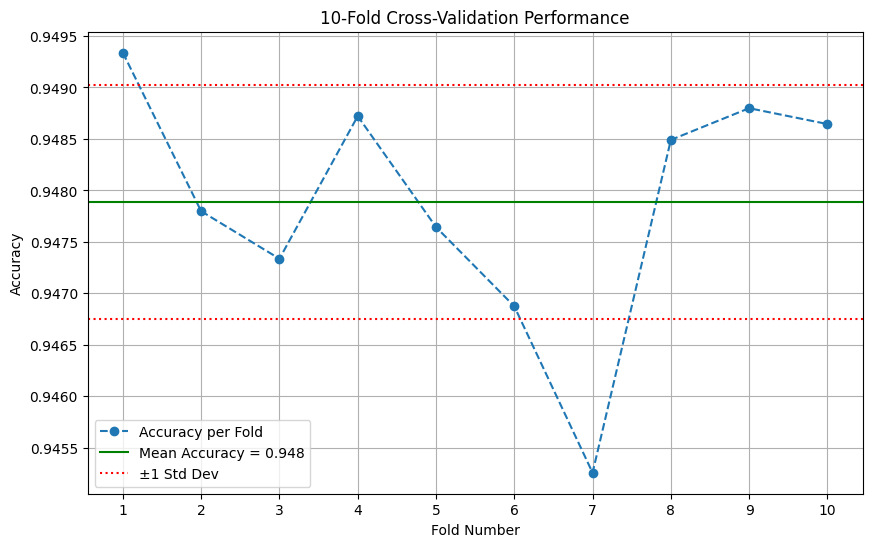


Test Set Accuracy (on X_test/y_test): 0.948


In [ ]:
# 10-fold cross validaiton

from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

cv = KFold(n_splits=10, shuffle=True, random_state=0)

scores = cross_val_score(tree, X, y, cv=cv, scoring="accuracy")

print("Cross-Validation Scores:", scores)
print("Mean Accuracy: {:.3f} (± {:.3f})".format(np.mean(scores), np.std(scores)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), scores, marker='o', linestyle='--', label='Accuracy per Fold')
plt.axhline(np.mean(scores), color='green', linestyle='-', label=f'Mean Accuracy = {np.mean(scores):.3f}')
plt.axhline(np.mean(scores) + np.std(scores), color='red', linestyle=':', label='±1 Std Dev')
plt.axhline(np.mean(scores) - np.std(scores), color='red', linestyle=':')
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.title("10-Fold Cross-Validation Performance")
plt.xticks(range(1, 11))
plt.legend()
plt.grid()
plt.show()

tree.fit(X_train, y_train)
test_accuracy = tree.score(X_test, y_test)
print(f"\nTest Set Accuracy (on X_test/y_test): {test_accuracy:.3f}")

Random Forest as an ensemble method to combines multiple decision trees to reduce overfitting and improve prediction accuracy by averaging their outputs. Also used to determine feature importance.

=== Random Forest Evaluation ===
Training Accuracy: 0.924
Test Accuracy: 0.922
Overfitting Gap: 0.001 (Good: <0.05)
OOB Score: Not enabled

AUC Score: 0.972 (1.0 = Perfect)


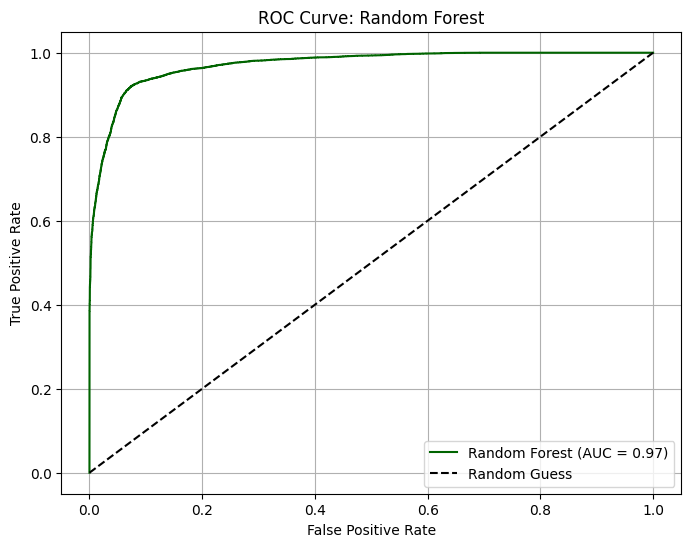

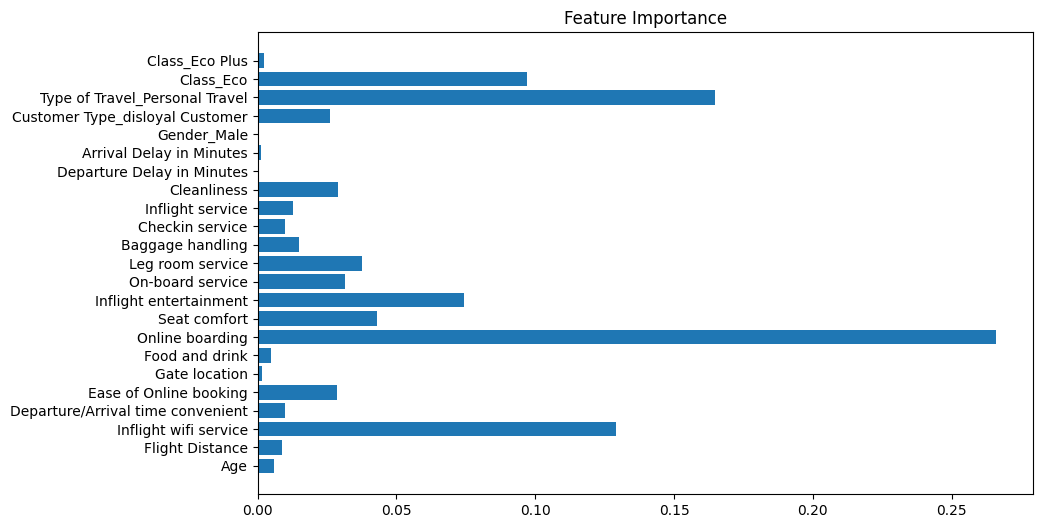

In [ ]:
# random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=0,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)
y_rf_proba = rf.predict_proba(X_test)[:, 1]

train_accuracy = rf.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_rf_pred)

print("=== Random Forest Evaluation ===")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Overfitting Gap: {train_accuracy - test_accuracy:.3f} (Good: <0.05)")
print(f"OOB Score: {rf.oob_score_:.3f}" if hasattr(rf, 'oob_score_') else "OOB Score: Not enabled")

auc_score = roc_auc_score(y_test, y_rf_proba)
print(f"\nAUC Score: {auc_score:.3f} (1.0 = Perfect)")

plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_rf_proba)
plt.plot(fpr, tpr, color='darkgreen', label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend()
plt.grid()
plt.show()

importances = rf.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance')
plt.show()

## Deployment

### Deployment Plan Overview
**Actionable Deployment Plan for the Airline:**

***Short-Term (1–3 months)***

- Identify dissatisfied passengers immediately after flights using the model

- Send apology emails, discounts, or feedback requests to those flagged as dissatisfied

- For neutral passengers, offer loyalty incentives to improve retention

- Improve digital services like online boarding and inflight WiFi (top features in both models)

- Launch a customer service protocol triggered by predictions (e.g., high-priority follow-up)

***Long-Term (3–12 months)***

- Use weekly batch analysis to find underperforming flight routes or services

- Invest in service upgrades where dissatisfaction is consistently high (e.g., WiFi, seat comfort)

- Personalize promotions: e.g., special offers to disloyal or personal-travel passengers identified by the Decision Tree

- Use satisfaction trends to inform staff training and route-specific management decisions


### Ethical Considerations
Fairness: Ensure the models don’t introduce bias based on travel class, gender, or loyalty status. Conduct regular fairness audits

Privacy & Compliance: Encrypt personal data in transit and at rest. Follow GDPR, CCPA, and airline-specific data protection regulations

Transparency: Use interpretable models. Explain key decision factors (e.g., online boarding score, travel type) to both staff and passengers if needed

Human Oversight: Ensure staff can review and override model decisions. Use predictions to support—not replace—human judgment

### Risks and Mitigation

Model Drift:	Retrain every 6 months or after major changes

Privacy Breach:	Encrypt data, audit systems regularly

Overreliance:	Train staff to use predictions as guides, not absolute

Downtime:	Cloud auto-scaling, backup servers, failover plans
